# Lab 2 - Understanding Preprocessing/Evaluation Metrics
## Coder Name: Janojit Chakraborty
## Coder Registration Number: 21112011

### Dataset Description: 
There are 3 sheets- Dataset1, Dataset2, and Dataset3. Dataset1 and Dataset2 are identical in nature, except for the number of entries. Assume that the features "True_Value" and "Predicted_Value" are Labels and Predictions of a Regression Model. In the Dataset3, there is another feature named as "Result", which is a Binary Categorical Variable (assumption is that the minimum marks to clear the exam is 70% [35 Marks]).

### Objective
- To Understand the logic behind different functions of sklearn.preprocessing

### Problem Definition
1. From the attached file, load the three different sheets as "df1", "df2", and "df3" onto the memory of Jupyter Notebook, as Python DataFrames.
2. Write the user defined functions for the implementation of following -
- 1. To find the measures of central tendency. Another function parameter can select what type of value should be returned.
- - 1. Mean
- - 2. Median
- - 3. Mode
- 2. To scale a list of Numerical Values between 0 and 1 (minimum and maximum will be respectively 0, and 1)
- 3. Given a number and a set of values (in a list), find the percentile of the number in that array set.
- 4. Given a set of values, categorise the datapoints into - LEFT_OUTLIER, MIN, Q1, Q2, Q3, MAX, RIGHT_OUTLIER, and plot the above values onto an axis
- 5. Given two sets of values, find the correlation between them
- 6. To encode and decode a Categorical Variable into a Numerical Representation.
- 7. To check the goodness of fit for the Regression Model using Evaluation Metrics. The evaluation metrics can be selected based on a parameter ("R2", "MSE", "MAE").
- - 1. R-Squared (R² or the coefficient of determination)
- - 2. Mean Squared Error
- - 3. Mean Absolute Error
3. Make use of the above user-defined functions, and illustrate the results. In addition that, perform the below tasks -
- 1. Test the User Defined Functions that you code for various functionalities, and verify its validity by comparing with functions in sklearn.preprocessing 
- 2. Find the percentile of the number "last two digits of your register number + 10" in df2.
- 3. Check whether the dataset size affects the values of Regression Evaluation Metrics
- 4. Is there any relationship between the Squared Pearson Correlation Coefficient and R2 value?

### Approach/Methods:
- Use User-Defined functions
- Implementing looping concept

### Learnings & Reflection:
- Enhance logic building capability
- Get background knowledge about statistical measures and evaluation metrices

Name: **Janojit Chakraborty** <br>
Reg No: **21112011** <br>
Class: **4 BSC DS** <br>

---------------


| Assignment | Status |
| --- | --- |
|  1  | __Completed__ |
|  2  | __Completed__ |
|  3  | __Completed__ |

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Question 1

In [2]:
df1 = pd.read_excel('Lab2_UDF_Labs.xlsx', 'Dataset1')
df1

,True_Value,Predicted_Value
0,10,10
1,17,17
2,26,24
3,30,31
4,31,31
5,32,32
6,35,33
7,36,37
8,38,37
9,39,40


In [3]:
df2 = pd.read_excel('Lab2_UDF_Labs.xlsx', 'Dataset2')
df2

,True_Value,Predicted_Value
0,10,10
1,16,17
2,17,17
3,20,19
4,26,24
5,28,28
6,30,31
7,31,31
8,31,31
9,32,32


In [4]:
df3 = pd.read_excel('Lab2_UDF_Labs.xlsx', 'Dataset3')
df3

,True_Value,Result,Predicted_Value
0,10,Fail,10
1,16,Fail,17
2,17,Fail,17
3,20,Fail,19
4,26,Fail,24
5,28,Fail,28
6,30,Fail,31
7,31,Fail,31
8,31,Fail,31
9,32,Fail,32


### Question 2.1

In [5]:
def central_tendency(column, mct):
    if mct == 'mean':
        count = 0
        total = 0
        for i in column:
            total += i
            count += 1
        mean = total / count
        return mean
        
    if mct == 'median':
        sortedValues = sorted(column)
        mid = (len(sortedValues) - 1) // 2
        if len(sortedValues) % 2 == 0:
            median = (sortedValues[mid - 1] + sortedValues[mid]) / 2
        else:
            median = sortedValues[mid]
        return median

    if mct == 'mode':
        valueCounts = {}
        maxx = 0
        mode = 0
        for i in column:
            if i in valueCounts:
                valueCounts[i] += 1
            else:
                valueCounts[i] = 1
            if valueCounts[i] > maxx:
                maxx = valueCounts[i]
                mode = i
        return mode

In [6]:
central_tendency(list(df1['True_Value']),'mode')

40

In [7]:
df1['True_Value'].mode()

0    40
Name: True_Value, dtype: int64

### Question 2.2

In [8]:
def minmax(arr):
    minMaxScl = []
    if not arr:
        return minMaxScl
    for i in arr:
        scaledVal = (i - min(arr)) / (max(arr) - min(arr))
        minMaxScl.append(scaledVal)
    return minMaxScl

In [9]:
minmax(list(df1['True_Value']))

[0.0,
 0.18421052631578946,
 0.42105263157894735,
 0.5263157894736842,
 0.5526315789473685,
 0.5789473684210527,
 0.6578947368421053,
 0.6842105263157895,
 0.7368421052631579,
 0.7631578947368421,
 0.7894736842105263,
 0.7894736842105263,
 0.8421052631578947,
 0.8947368421052632,
 1.0]

### Question 2.3

In [10]:
def percentile(num, arr):
    if not arr:
        return None
    sortedValues = sorted(arr)
    count = 0
    for i in sortedValues:
        if i <= num:
            count += 1
    percentile = (count / len(sortedValues)) * 100
    return percentile


In [11]:
percentile(48,[10,20,30,40,50])

80.0

### Question 2.4

In [12]:
def plot(arr):
    if not arr:
        return
    
    sortedValues = sorted(arr)
    
    n = len(sortedValues)
    
    q1 = sortedValues[n // 4]
    q2 = sortedValues[n // 2]
    q3 = sortedValues[3 * n // 4]

    iqr = q3 - q1

    minn = q1 - 1.5 * iqr
    maxx = q3 + 1.5 * iqr
    
    leftOutliers = []
    rightOutliers = []
    
    for i in sortedValues:
        if i < q1 - 1.5 * iqr:
            leftOutliers.append(i)
        elif i > q3 + 1.5 * iqr:
            rightOutliers.append(i)

    x = [minn,q1,q2,q3,maxx]
    y = []
    for i in x:
        y.append(0)
    print("Min: ",minn)
    print("Q1: ",q1)
    print("Q2: ",q2)
    print("Q3: ",q3)
    print("Max: ",maxx)
    print("Left Outliers: ",leftOutliers)
    print("Right Outliers: ",rightOutliers)
    color = ['blue','red','green','yellow','violet']
    plt.scatter(x, y, c = color)
    plt.show()

Min:  15.0
Q1:  30
Q2:  36
Q3:  40
Max:  55.0
Left Outliers:  [10]
Right Outliers:  []


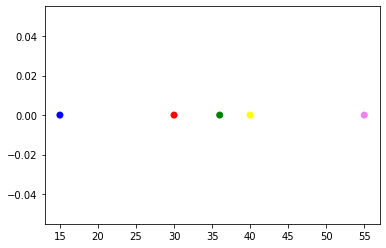

In [13]:
plot(list(df1['True_Value']))

### Question 2.5

In [14]:
def correlation(x, y):
    n = len(x)
    sum_x = 0
    sum_y = 0
    sum_xy = 0
    sum_x_squared = 0
    sum_y_squared = 0

    for i in range(n):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i]*y[i]
        sum_x_squared += x[i]**2
        sum_y_squared += y[i]**2

    if (((n*sum_x_squared - sum_x**2)*(n*sum_y_squared - sum_y**2))**0.5) == 0:
        return 0
    else:
        return (n*sum_xy - sum_x*sum_y) / (((n*sum_x_squared - sum_x**2)*(n*sum_y_squared - sum_y**2))**0.5)

In [15]:
correlation(list(df1['True_Value']),list(df1['Predicted_Value']))

0.9926079531311158

### Question 2.6

In [16]:
def encoder(arr):
    encoding = {}
    for i in set(arr):
        if i not in encoding:
            encoding[i] = len(encoding)
    encoded = []
    for i in arr:
        encode = encoding[i]
        encoded.append(encode)
    return encoded, encoding

def decoder(encoded, encoding):
    decoded = []
    for value in encoded:
        decoded_value = list(encoding.keys())[list(encoding.values()).index(value)]
        decoded.append(decoded_value)
    return decoded

In [17]:
encoded, encoding = encoder(df3['Result'])

In [18]:
encoded

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [19]:
encoding

{'Fail': 0, 'Pass': 1}

In [20]:
decoder(encoded, encoding)

['Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Fail',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass',
 'Pass']

### Question 2.7

In [21]:
def r_squared(y_true, y_pred):
    mean_y = sum(y_true) / len(y_true)
    tss = sum([(y - mean_y) ** 2 for y in y_true])
    rss = sum([(y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true))])
    r_squared = 1 - rss / tss
    return r_squared

In [22]:
def mse(y_true, y_pred):
    n = len(y_true)
    squared_error = [(y_true[i] - y_pred[i])**2 for i in range(n)]
    mse = sum(squared_error) / n
    return mse

In [23]:
def mae(y_true, y_pred):
    n = len(y_true)
    absolute_error = [abs(y_true[i] - y_pred[i]) for i in range(n)]
    mae = sum(absolute_error) / n
    return mae

In [24]:
def evaluationMetrics(y_true,y_pred,evalmat):
    if evalmat == 'r2_score':
        mean_y = sum(y_true) / len(y_true)
        tss = sum([(y - mean_y) ** 2 for y in y_true])
        rss = sum([(y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true))])
        r_squared = 1 - rss / tss
        return r_squared
        return r_squared
    if evalmat == 'mse':
        n = len(y_true)
        squared_error = [(y_true[i] - y_pred[i])**2 for i in range(n)]
        mse = sum(squared_error) / n
        return mse
    if evalmat == 'mae':
        n = len(y_true)
        absolute_error = [abs(y_true[i] - y_pred[i]) for i in range(n)]
        mae = sum(absolute_error) / n
        return mae

In [25]:
print("R-Squared Score: ",evaluationMetrics(list(df3['True_Value']), list(df3['Predicted_Value']),'r2_score'))
print("Mean Squared Error: ",evaluationMetrics(list(df3['True_Value']), list(df3['Predicted_Value']),'mse'))
print("Mean Absolute Error: ",evaluationMetrics(list(df3['True_Value']), list(df3['Predicted_Value']),'mae'))

R-Squared Score:  0.9770192544890355
Mean Squared Error:  1.9666666666666666
Mean Absolute Error:  0.9


## Question 3.1

**Mean**

In [26]:
central_tendency(list(df1['True_Value']),'mean')

33.86666666666667

**Using In Built Method**

In [27]:
df1['True_Value'].mean()

33.86666666666667

**Median**

In [28]:
central_tendency(list(df1['True_Value']),'median')

36

**Using In Built Method**

In [29]:
df1['True_Value'].median()

36.0

**Mode**

In [30]:
central_tendency(list(df1['True_Value']),'mode')

40

**Using In Built Method**

In [31]:
df1['True_Value'].mode()

0    40
Name: True_Value, dtype: int64

**Min-Max-Scaler**

In [32]:
minmax(list(df1['True_Value']))

[0.0,
 0.18421052631578946,
 0.42105263157894735,
 0.5263157894736842,
 0.5526315789473685,
 0.5789473684210527,
 0.6578947368421053,
 0.6842105263157895,
 0.7368421052631579,
 0.7631578947368421,
 0.7894736842105263,
 0.7894736842105263,
 0.8421052631578947,
 0.8947368421052632,
 1.0]

**Using Sklearn**

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

print(scaler.fit_transform(df1[['True_Value']]))

[[0.        ]
 [0.18421053]
 [0.42105263]
 [0.52631579]
 [0.55263158]
 [0.57894737]
 [0.65789474]
 [0.68421053]
 [0.73684211]
 [0.76315789]
 [0.78947368]
 [0.78947368]
 [0.84210526]
 [0.89473684]
 [1.        ]]


**Outliers**

Min:  17.5
Q1:  31
Q2:  37
Q3:  40
Max:  53.5
Left Outliers:  [10, 17, 17]
Right Outliers:  []


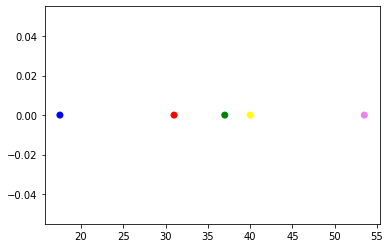

In [34]:
plot(list(df2['Predicted_Value']))

**Using In Built Method**

{'whiskers': [<matplotlib.lines.Line2D at 0x2a6d2c57670>,
 'caps': [<matplotlib.lines.Line2D at 0x2a6d2c57b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a6d2c573d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a6d2c6c0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a6d2c6c370>],
 'means': []}

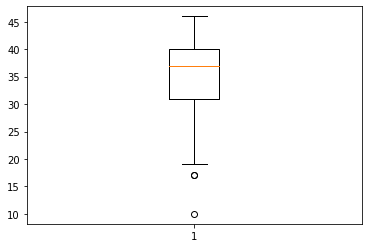

In [35]:
plt.boxplot(df2['Predicted_Value'])

**Correlation**

In [36]:
correlation(list(df2['True_Value']),list(df2['Predicted_Value']))

0.9910681530734977

**Using In Built Method**

In [37]:
df2.corr()

,True_Value,Predicted_Value
True_Value,1.000000,0.991068
Predicted_Value,0.991068,1.000000


**Encoding**

In [38]:
encoded, encoding = encoder(df3['Result'])

print("Encoded Values: ",encoded)
print("\n")
print(encoding)
print("\n")
print("Decoded Values: ",decoder(encoded, encoding))

Encoded Values:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


{'Fail': 0, 'Pass': 1}


Decoded Values:  ['Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']


**Using Sklearn**

In [39]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

encoded = le.fit_transform(df3['Result'])
print("Encoded Values: ",encoded)
print("\n")
decoded = le.inverse_transform(encoded)
print("Decoded Values: ",decoded)

Encoded Values:  [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


Decoded Values:  ['Fail' 'Fail' 'Fail' 'Fail' 'Fail' 'Fail' 'Fail' 'Fail' 'Fail' 'Fail'
 'Fail' 'Fail' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass'
 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass' 'Pass']


**R-Squared**

In [40]:
print("R-Squared Score: ",r_squared(list(df3['True_Value']), list(df3['Predicted_Value'])))

R-Squared Score:  0.9770192544890355


**Using Sklearn**

In [41]:
from sklearn.metrics import r2_score
print("R-Squared Score: ",r2_score(df3['True_Value'],df3['Predicted_Value']))

R-Squared Score:  0.9770192544890355


**Mean Squared Error**

In [42]:
print("Mean Squared Error: ",mse(list(df3['True_Value']), list(df3['Predicted_Value'])))

Mean Squared Error:  1.9666666666666666


**Using Sklearn**

In [43]:
from sklearn.metrics import mean_squared_error
print("Mean Squared Error: ",mean_squared_error(df3['True_Value'],df3['Predicted_Value']))

Mean Squared Error:  1.9666666666666666


**Mean Absolute Error**

In [44]:
print("Mean Absolute Error: ",mae(list(df3['True_Value']), list(df3['Predicted_Value'])))

Mean Absolute Error:  0.9


**Using Sklearn**

In [45]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error: ",mean_absolute_error(df3['True_Value'],df3['Predicted_Value']))

Mean Absolute Error:  0.9


## Question 3.2

In [46]:
percentile(21,list(df2['True_Value']))

13.333333333333334

## Question 3.3

In [49]:
print("R-Squared Score: ",r_squared(list(df3['True_Value']), list(df3['Predicted_Value']))," for df3")
print("R-Squared Score: ",r_squared(list(df2['True_Value']), list(df2['Predicted_Value']))," for df2")
print("R-Squared Score: ",r_squared(list(df1['True_Value']), list(df1['Predicted_Value']))," for df1")

R-Squared Score:  0.9770192544890355  for df3
R-Squared Score:  0.9770192544890355  for df2
R-Squared Score:  0.9825872956909361  for df1


In [50]:
print("Mean Squared Error: ",mse(list(df3['True_Value']), list(df3['Predicted_Value']))," for df3")
print("Mean Squared Error: ",mse(list(df2['True_Value']), list(df2['Predicted_Value']))," for df2")
print("Mean Squared Error: ",mse(list(df1['True_Value']), list(df1['Predicted_Value']))," for df1")

Mean Squared Error:  1.9666666666666666  for df3
Mean Squared Error:  1.9666666666666666  for df2
Mean Squared Error:  1.6666666666666667  for df1


In [51]:
print("Mean Absolute Error: ",mae(list(df3['True_Value']), list(df3['Predicted_Value']))," for df3")
print("Mean Absolute Error: ",mae(list(df2['True_Value']), list(df2['Predicted_Value']))," for df2")
print("Mean Absolute Error: ",mae(list(df1['True_Value']), list(df1['Predicted_Value']))," for df1")

Mean Absolute Error:  0.9  for df3
Mean Absolute Error:  0.9  for df2
Mean Absolute Error:  0.8666666666666667  for df1


**Inference:**<br>
From the above Regression Evaluation Metrics we observed that the R-Squared Score(Accuracy) increases as testing datasize decreases and Errors(MSE & MAE) also decreases when testing datasize decreases. From this observation we can infer that as Testing Datasize has a inverse relationship with model's Accuracy.

## Question 3.4

In [47]:
print("R-Squared Score: ",evaluationMetrics(list(df3['True_Value']), list(df3['Predicted_Value']),'r2_score'))
print("Correlation Value: ",correlation(list(df3['True_Value']),list(df3['Predicted_Value'])))

R-Squared Score:  0.9770192544890355
Correlation Value:  0.9910681530734977


**Inference:**<br>
Correlation infers the association or dependency between two variables. Whereas R-Squared score tells us in a Linear Regression model the variance of dependent variable by independent variables.